# Basic Usage

In [ ]:
import numpy as np

from py21cmemu import Emulator

import matplotlib.pyplot as plt

from matplotlib import rcParams
import matplotlib.patches as mpatches
rcParams.update({'font.size': 40})

We begin by loading the data sample. This is a small subsample of 100 test set elements. 

In [2]:
test_sample = np.load('Test_data_sample.npz')
print(list(test_sample.keys()))

['X_test', 'parameters', 'limits', 'Ts', 'Tb', 'PS', 'tau', 'UVLFs', 'xHI']


Now we load the astro params.

In [3]:
test_params = test_sample['X_test']

Here we load the `21cmFAST` summaries for these parameters.

In [4]:
Tb_true = test_sample['Tb']
xHI_true = test_sample['xHI']

## Get emulated summaries with 21cmEMU

In [ ]:
emu = Emulator()
normed_input_params, output, output_errors = emu.predict(test_params, verbose = True)

In [6]:
Tb_emu = output['Tb']
xHI_emu = output['xHI']
zs = output['redshifts']

We plot the emulated summary (dash-dotted) vs the true summary from the test set (solid line). We define a generic function to do all of the plotting.

In [7]:
def plot_true_vs_emu(x, y_true, y_emu, x_label, 
                     y_label, xlims = None, N = 10, offset = 0,
                     cs = None, leg_loc = (0.5,0.5)):
    if cs is None:
        cs = ['k','lime','b', 'orange', 'cyan', 'magenta', 'grey', 'pink', 'darkred', 'coral']
    y_diff = abs(y_true - y_emu)
    fig, axs = plt.subplots(nrows = 2, ncols = 1, sharex = True,figsize = (14,12), gridspec_kw=dict(height_ratios=[3,2], hspace=0))
    axs = axs.flatten()

    diff_err_z = np.nanpercentile(y_diff, [2.5, 16,50, 84, 97.5], axis = 0)
    for i, c in zip(range(N), cs):
        if i == N-1:
            labels = ['21cmEMU', 'Test Set']
        else:
            labels = [None, None]
        axs[0].plot(x, y_true[i + offset, :], lw = 3, color = c, label = labels[1])
        axs[1].plot(x, y_diff[i + offset, :], ls = '-.', alpha = 0.5, lw = 2, color = c)
        axs[0].plot(x, y_emu[i + offset, :], lw = 2, ls = '-.', color = c, label = labels[0])

    axs[0].legend(loc = leg_loc, frameon = False)#framealpha=0.3)
    axs[1].plot(x, diff_err_z[2, :], ls = '--', lw = 3, color = 'k', label = r'Median')
    axs[1].fill_between(x, diff_err_z[1, :], diff_err_z[3, :], color = 'k', alpha = 0.2, label = r'68% CI')
    axs[1].fill_between(x, diff_err_z[0, :], diff_err_z[4, :], color = 'k', alpha = 0.1, label = r'95% CI')

    handles = [mpatches.Patch(color='k', label='68% CI', alpha = 0.3),
              mpatches.Patch(color='k', label='95% CI', alpha = 0.1),
              ]
    plt.legend(handles=handles, loc = (0.6,0.5), frameon = False)
    axs[0].set_ylabel(y_label)
    axs[1].set_ylabel(r'Abs Diff')
    axs[1].set_xlabel(x_label)
    if xlims is not None:
        plt.xlim(xlims[0], xlims[1])
    else:
        plt.xlim(min(x), max(x))
    plt.tight_layout()
    plt.show()

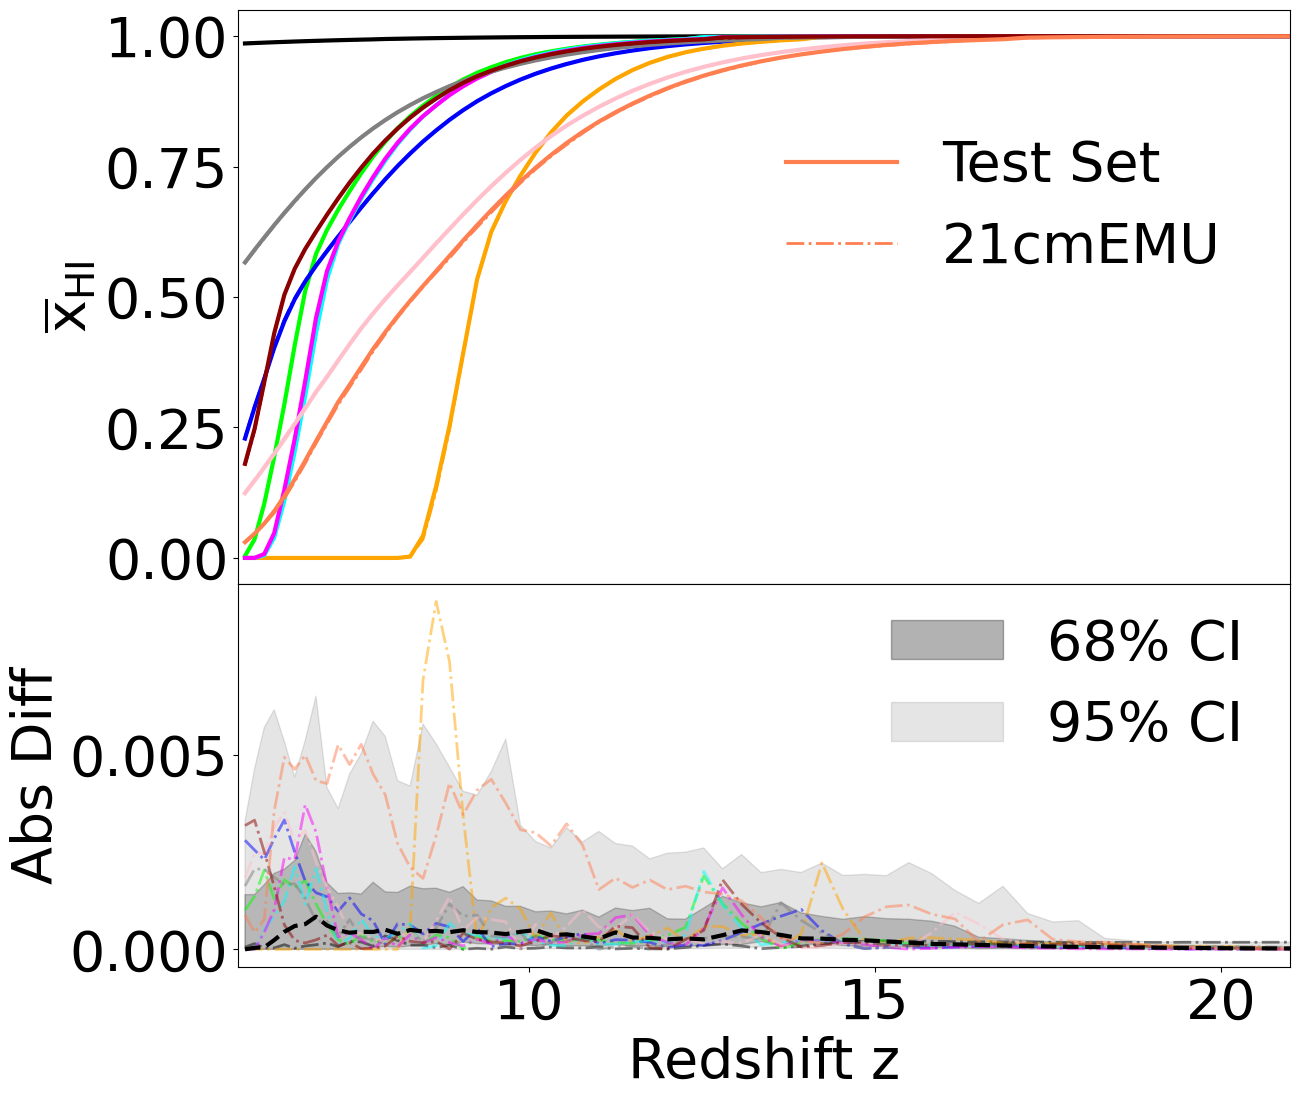

In [8]:
plot_true_vs_emu(zs, xHI_true, xHI_emu, r'Redshift z', r'$\overline{\mathrm{x}}_{\rm{HI}}$', xlims = [5.8, 21])

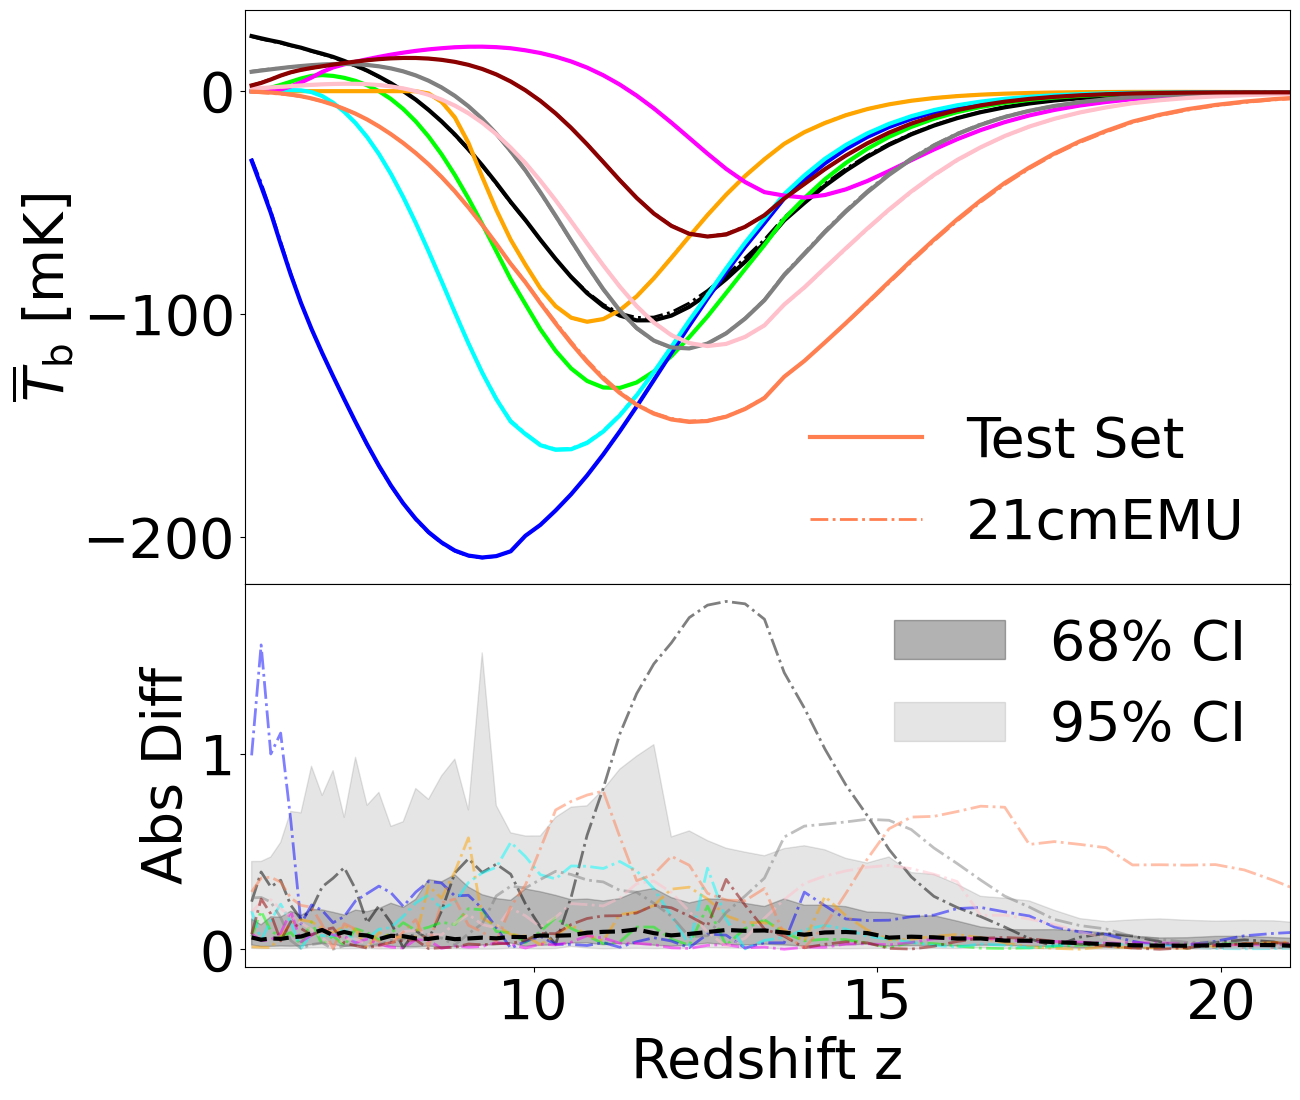

In [9]:
plot_true_vs_emu(zs, Tb_true, Tb_emu, 
                 r'Redshift z', r'$\overline{T}_{\rm{b}}$ [mK]', 
                 xlims = [5.8, 21],
                 leg_loc = (0.52,0.02))

These plots are the same as the ones in the paper (except for the 68% and 95% credible intervals, which are calculated on a small subsample of the test set here). 
You can try making more of these same plots for other summaries e.g. power spectrum, spin temperature, etc.